In [5]:
import os

import numpy as np
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle

FTRAIN = '../all (1)/training.csv'
FTEST = '../all (1)/test.csv'

def load(test=False, cols=None):
    fname = FTEST if test else FTRAIN
    df = read_csv(os.path.expanduser(fname))

    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    if cols:
        df = df[list(cols) + ['Image']]

    print(df.count())
    df = df.dropna()

    X = np.vstack(df['Image'].values) / 255.
    X = X.astype(np.float32)

    if not test:
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48 
        X, y = shuffle(X, y, random_state=42)
        y = y.astype(np.float32)
    else:
        y = None

    return X, y

X, y = load()
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(
    X.shape, X.min(), X.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(
    y.shape, y.min(), y.max()))

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(100, input_dim=9216))
model.add(Activation('relu'))
model.add(Dense(30))

sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)
hist = model.fit(X, y, nb_epoch=100, validation_split=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Train on 1712 samples, validate on 428 samples
Epoch 1/100
1712/1712 [==============================] - 1s 763us/step - loss: 0.0598 - val_loss: 0.0138
Epoch 2/100
1712/1712 [==============================] - 1s 475us/step - loss: 0.0114 - val_loss: 0.0117
Epoch 3/100
1712/1712 [==============================] - 1s 475us/step - loss: 0.0100 - val_loss: 0.0101
Epoch 4/100
1712/1712 [==============================] - 1s 468us/step - loss: 0.0091 - val_loss: 0.0087
Epoch 5/100
1712/1712 [==============================] - 1s 483us/step - loss: 0.0084 - val_loss: 0.0084
Epoch 6/100
1712/1712 [==============================] - 1s 457us/step - loss: 0.0080 - val_loss: 0.0085
Epoch 7/100
1712/1712 [==============================] - 1s 468us/step - loss: 0.0076 - val_loss: 0.0077
Epoch 8/100
1712/1712 [==============================] - 1s 491us/step - loss: 0.0074 - val_loss: 0.0075
Epoch 9/100
1712/1712 [==============================] - 1s 475us/step - loss: 0.0070 - val_loss: 0.0073
Epoch 10

Epoch 78/100
1712/1712 [==============================] - 1s 465us/step - loss: 0.0030 - val_loss: 0.0039
Epoch 79/100
1712/1712 [==============================] - 1s 512us/step - loss: 0.0030 - val_loss: 0.0038
Epoch 80/100
1712/1712 [==============================] - 1s 506us/step - loss: 0.0029 - val_loss: 0.0040
Epoch 81/100
1712/1712 [==============================] - 1s 500us/step - loss: 0.0029 - val_loss: 0.0039
Epoch 82/100
1712/1712 [==============================] - 1s 519us/step - loss: 0.0029 - val_loss: 0.0041
Epoch 83/100
1712/1712 [==============================] - 1s 503us/step - loss: 0.0029 - val_loss: 0.0040
Epoch 84/100
1712/1712 [==============================] - 1s 491us/step - loss: 0.0029 - val_loss: 0.0043
Epoch 85/100
1712/1712 [==============================] - 1s 490us/step - loss: 0.0028 - val_loss: 0.0037
Epoch 86/100
1712/1712 [==============================] - 1s 512us/step - loss: 0.0029 - val_loss: 0.0037
Epoch 87/100
1712/1712 [======================

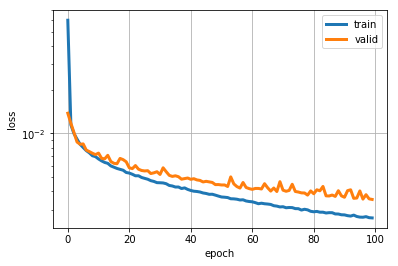

In [72]:
import matplotlib.pylab as plt
%matplotlib inline

plt.plot(hist.history['loss'], linewidth=3, label='train')
plt.plot(hist.history['val_loss'], linewidth=3, label='valid')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.yscale('log')
plt.show()

In [32]:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10, color = 'red')

ImageId    1783
Image      1783
dtype: int64


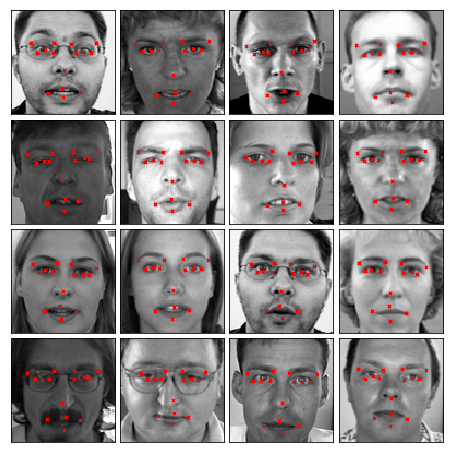

In [33]:
X_test, _ = load(test=True)
y_test = model.predict(X_test)

fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X[i], y_pred[i], ax)

plt.show()

In [34]:
json_string = model.to_json()
open('model1_architecture.json', 'w').write(json_string)
model.save_weights('model1_weights.h5')

In [35]:
from keras.models import model_from_json
model = model_from_json(open('model1_architecture.json').read())
model.load_weights('model1_weights.h5')

In [36]:
def load2d(test=False, cols=None):
    X, y = load(test, cols)
    X = X.reshape(-1, 1, 96, 96)
    return X, y

In [42]:
from keras.layers import Convolution2D, MaxPooling2D, Flatten

X, y = load2d()
model2 = Sequential()

model2.add(Convolution2D(32, 3, strides = 3, input_shape=(1, 96, 96), data_format = 'channels_first'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Convolution2D(64, 2, strides = 2))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Convolution2D(128, 2, strides = 2))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(500))
model2.add(Activation('relu'))
model2.add(Dense(500))
model2.add(Activation('relu'))
model2.add(Dense(30))

sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model2.compile(loss='mean_squared_error', optimizer=sgd)
hist2 = model2.fit(X, y, nb_epoch=1000, validation_split=0.2)

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1712 samples, validate on 428 samples
Epoch 1/1000
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0692 - val_loss: 0.0081
Epoch 2/1000
1712/1712 [==============================] - 12s 7ms/step - loss: 0.0061 - val_loss: 0.0055
Epoch 3/1000
1712/1712 [==============================] - 11s 6ms/step - loss: 0.0057 - val_loss: 0.0054
Epoch 4/1000
1712/1712 [==============================] - 12s 7ms/step - loss: 0.0056 - val_loss: 0.0053
Epoch 5/1000
1712/1712 [==============================] - 11s 6ms/step - loss: 0.0055 - val_loss: 0.0052
Epoch 6/1000
1712/1712 [==============================] - 16s 10ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 7/1000
1712/1712 [==============================] - 11s 6ms/step - loss: 0.0053 - val_loss: 0.0051
Epoch 8/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 9/1000
1712/1712 [==============================] - 11s 6ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 

Epoch 78/1000
1712/1712 [==============================] - 11s 7ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 79/1000
1712/1712 [==============================] - 12s 7ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 80/1000
1712/1712 [==============================] - 12s 7ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 81/1000
1712/1712 [==============================] - 13s 8ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 82/1000
1712/1712 [==============================] - 15s 9ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 83/1000
1712/1712 [==============================] - 15s 9ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 84/1000
1712/1712 [==============================] - 15s 8ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 85/1000
1712/1712 [==============================] - 13s 7ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 86/1000
1712/1712 [==============================] - 14s 8ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 87/1000
1712/1712 [=====================

1712/1712 [==============================] - 12s 7ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 155/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 156/1000
1712/1712 [==============================] - 11s 6ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 157/1000
1712/1712 [==============================] - 11s 7ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 158/1000
1712/1712 [==============================] - 11s 6ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 159/1000
1712/1712 [==============================] - 11s 6ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 160/1000
1712/1712 [==============================] - 11s 6ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 161/1000
1712/1712 [==============================] - 11s 6ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 162/1000
1712/1712 [==============================] - 11s 6ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 163/1000
1712/1712 [==========================

1712/1712 [==============================] - 12s 7ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 231/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 232/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 233/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 234/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 235/1000
1712/1712 [==============================] - 11s 7ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 236/1000
1712/1712 [==============================] - 9s 5ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 237/1000
1712/1712 [==============================] - 9s 6ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 238/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 239/1000
1712/1712 [============================

1712/1712 [==============================] - 11s 7ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 307/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 308/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 309/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 310/1000
1712/1712 [==============================] - 12s 7ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 311/1000
1712/1712 [==============================] - 11s 7ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 312/1000
1712/1712 [==============================] - 11s 6ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 313/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 314/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 315/1000
1712/1712 [==========================

1712/1712 [==============================] - 10s 6ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 383/1000
1712/1712 [==============================] - 12s 7ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 384/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 385/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 386/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 387/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 388/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 389/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 390/1000
1712/1712 [==============================] - 12s 7ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 391/1000
1712/1712 [==========================

Epoch 459/1000
1712/1712 [==============================] - 11s 6ms/step - loss: 0.0037 - val_loss: 0.0039
Epoch 460/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0037 - val_loss: 0.0039
Epoch 461/1000
1712/1712 [==============================] - 11s 6ms/step - loss: 0.0037 - val_loss: 0.0039
Epoch 462/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0037 - val_loss: 0.0039
Epoch 463/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0037 - val_loss: 0.0039
Epoch 464/1000
1712/1712 [==============================] - 9s 5ms/step - loss: 0.0037 - val_loss: 0.0039
Epoch 465/1000
1712/1712 [==============================] - 9s 5ms/step - loss: 0.0037 - val_loss: 0.0039
Epoch 466/1000
1712/1712 [==============================] - 9s 5ms/step - loss: 0.0037 - val_loss: 0.0039
Epoch 467/1000
1712/1712 [==============================] - 9s 5ms/step - loss: 0.0037 - val_loss: 0.0039
Epoch 468/1000
1712/1712 [===============

1712/1712 [==============================] - 11s 7ms/step - loss: 0.0036 - val_loss: 0.0039
Epoch 536/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0036 - val_loss: 0.0038
Epoch 537/1000
1712/1712 [==============================] - 11s 6ms/step - loss: 0.0036 - val_loss: 0.0038
Epoch 538/1000
1712/1712 [==============================] - 12s 7ms/step - loss: 0.0036 - val_loss: 0.0038
Epoch 539/1000
1712/1712 [==============================] - 12s 7ms/step - loss: 0.0036 - val_loss: 0.0038
Epoch 540/1000
1712/1712 [==============================] - 12s 7ms/step - loss: 0.0036 - val_loss: 0.0038
Epoch 541/1000
1712/1712 [==============================] - 12s 7ms/step - loss: 0.0036 - val_loss: 0.0038
Epoch 542/1000
1712/1712 [==============================] - 11s 6ms/step - loss: 0.0036 - val_loss: 0.0038
Epoch 543/1000
1712/1712 [==============================] - 11s 7ms/step - loss: 0.0036 - val_loss: 0.0039
Epoch 544/1000
1712/1712 [==========================

1712/1712 [==============================] - 11s 6ms/step - loss: 0.0034 - val_loss: 0.0037
Epoch 613/1000
1712/1712 [==============================] - 11s 7ms/step - loss: 0.0034 - val_loss: 0.0037
Epoch 614/1000
1712/1712 [==============================] - 12s 7ms/step - loss: 0.0034 - val_loss: 0.0037
Epoch 615/1000
1712/1712 [==============================] - 12s 7ms/step - loss: 0.0034 - val_loss: 0.0037
Epoch 616/1000
1712/1712 [==============================] - 13s 8ms/step - loss: 0.0034 - val_loss: 0.0037
Epoch 617/1000
1712/1712 [==============================] - 12s 7ms/step - loss: 0.0034 - val_loss: 0.0037
Epoch 618/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0034 - val_loss: 0.0037
Epoch 619/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0034 - val_loss: 0.0037
Epoch 620/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0034 - val_loss: 0.0037
Epoch 621/1000
1712/1712 [==========================

1712/1712 [==============================] - 11s 7ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 689/1000
1712/1712 [==============================] - 11s 7ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 690/1000
1712/1712 [==============================] - 14s 8ms/step - loss: 0.0033 - val_loss: 0.0037
Epoch 691/1000
1712/1712 [==============================] - 11s 7ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 692/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 693/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 694/1000
1712/1712 [==============================] - 11s 6ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 695/1000
1712/1712 [==============================] - 11s 6ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 696/1000
1712/1712 [==============================] - 11s 7ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 697/1000
1712/1712 [==========================

1712/1712 [==============================] - 12s 7ms/step - loss: 0.0031 - val_loss: 0.0036
Epoch 765/1000
1712/1712 [==============================] - 15s 9ms/step - loss: 0.0031 - val_loss: 0.0036
Epoch 766/1000
1712/1712 [==============================] - 12s 7ms/step - loss: 0.0031 - val_loss: 0.0036
Epoch 767/1000
1712/1712 [==============================] - 13s 8ms/step - loss: 0.0031 - val_loss: 0.0036
Epoch 768/1000
1712/1712 [==============================] - 13s 8ms/step - loss: 0.0031 - val_loss: 0.0036
Epoch 769/1000
1712/1712 [==============================] - 14s 8ms/step - loss: 0.0031 - val_loss: 0.0036
Epoch 770/1000
1712/1712 [==============================] - 17s 10ms/step - loss: 0.0031 - val_loss: 0.0035
Epoch 771/1000
1712/1712 [==============================] - 16s 9ms/step - loss: 0.0031 - val_loss: 0.0035
Epoch 772/1000
1712/1712 [==============================] - 14s 8ms/step - loss: 0.0031 - val_loss: 0.0035
Epoch 773/1000
1712/1712 [=========================

Epoch 841/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch 842/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch 843/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch 844/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch 845/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch 846/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch 847/1000
1712/1712 [==============================] - 11s 6ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch 848/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch 849/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch 850/1000
1712/1712 [===========

1712/1712 [==============================] - 10s 6ms/step - loss: 0.0028 - val_loss: 0.0035
Epoch 918/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0028 - val_loss: 0.0034
Epoch 919/1000
1712/1712 [==============================] - 11s 6ms/step - loss: 0.0028 - val_loss: 0.0034
Epoch 920/1000
1712/1712 [==============================] - 13s 7ms/step - loss: 0.0028 - val_loss: 0.0034
Epoch 921/1000
1712/1712 [==============================] - 14s 8ms/step - loss: 0.0028 - val_loss: 0.0034
Epoch 922/1000
1712/1712 [==============================] - 12s 7ms/step - loss: 0.0028 - val_loss: 0.0034
Epoch 923/1000
1712/1712 [==============================] - 13s 8ms/step - loss: 0.0028 - val_loss: 0.0035
Epoch 924/1000
1712/1712 [==============================] - 11s 6ms/step - loss: 0.0028 - val_loss: 0.0034
Epoch 925/1000
1712/1712 [==============================] - 11s 6ms/step - loss: 0.0028 - val_loss: 0.0034
Epoch 926/1000
1712/1712 [==========================

1712/1712 [==============================] - 10s 6ms/step - loss: 0.0027 - val_loss: 0.0034
Epoch 994/1000
1712/1712 [==============================] - 12s 7ms/step - loss: 0.0027 - val_loss: 0.0034
Epoch 995/1000
1712/1712 [==============================] - 12s 7ms/step - loss: 0.0027 - val_loss: 0.0034
Epoch 996/1000
1712/1712 [==============================] - 10s 6ms/step - loss: 0.0027 - val_loss: 0.0034
Epoch 997/1000
1712/1712 [==============================] - 12s 7ms/step - loss: 0.0027 - val_loss: 0.0034
Epoch 998/1000
1712/1712 [==============================] - 12s 7ms/step - loss: 0.0027 - val_loss: 0.0034
Epoch 999/1000
1712/1712 [==============================] - 12s 7ms/step - loss: 0.0027 - val_loss: 0.0034
Epoch 1000/1000
1712/1712 [==============================] - 12s 7ms/step - loss: 0.0027 - val_loss: 0.0034


In [79]:
import pydot_ng as pydot
plot_model(model2, to_file='model_plot.png', show_shapes=True)

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

ImageId    1783
Image      1783
dtype: int64
ImageId    1783
Image      1783
dtype: int64


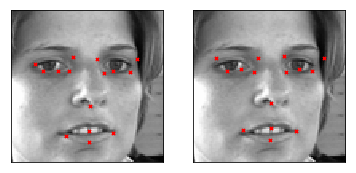

In [83]:
sample1 = load(test=True)[0][6:7]
sample2 = load2d(test=True)[0][6:7]
y_pred1 = model.predict(sample1)[0]
y_pred2 = model2.predict(sample2)[0]

fig = pyplot.figure(figsize=(6, 3))
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
plot_sample(sample1, y_pred1, ax)
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
plot_sample(sample2, y_pred2, ax)
pyplot.show()

In [ ]:
X, y = load2d()
X_flipped = X[:, :, :, ::-1]

fig = pyplot.figure(figsize=(6, 3))
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
plot_sample(X[1], y[1], ax)
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
plot_sample(X_flipped[1], y[1], ax)
pyplot.show()

In [ ]:
flip_indices = [
    (0, 2), (1, 3),
    (4, 8), (5, 9), (6, 10), (7, 11),
    (12, 16), (13, 17), (14, 18), (15, 19),
    (22, 24), (23, 25),
    ]

df = read_csv(os.path.expanduser(FTRAIN))
for i, j in flip_indices:
    print("{} -> {}".format(df.columns[i], df.columns[j]))